# Центральная предельная теорема своими руками

In [2]:
%matplotlib inline

import numpy as np
from scipy.stats import chi2, norm, gamma
import matplotlib.pyplot as plt
import itertools

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Было выбрано распределение хи-квадрат
\begin{align} X\sim \mathrm chi^{2} (k) \end{align} где \begin{equation*} k=9\end{equation*}

In [3]:
k=9

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

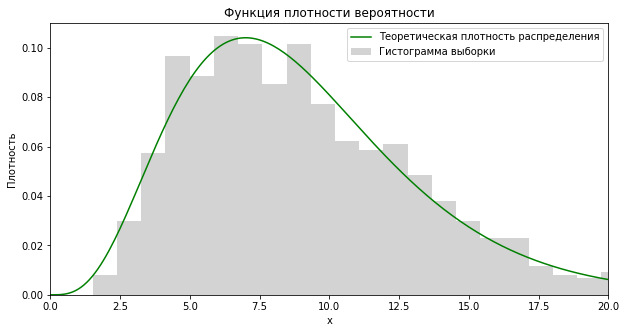

In [5]:
sample=chi2.rvs(df=k, size=1000)

plt.figure(figsize=(10,5))
plt.hist(sample, 30, normed=True, color='lightgrey', label=u'Гистограмма выборки')

#Теоретическая плотность распределения
x = np.arange(0.,30.,0.1)

plt.plot(x, chi2.pdf(x, df=k), 'g', alpha=1, label=u'Теоретическая плотность распределения')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel(u'Плотность')

plt.xlim(0,20)
plt.title(u'Функция плотности вероятности')
plt.show()


Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних.

Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Для данного распредения известно, что: 

\begin{align}  {E} [Y]=k,    
{D} [Y]=2k \end{align}

В моем случае мат.ожидание  = 9, дисперсия =  18.

Нормальное распределение считаем по формуле: $\\sqrt {DX/n}$, n - это размер выборки

#### Функция вычисления среднего из 1000 выборок для n

In [23]:
def sample_mean(n, x_min,x_max):
    means = []
    for i in range(1000):
        means.append(chi2(df=k).rvs(n).mean())
    # строим гистограмму
    plt.hist(means,  30, normed=True, color='lightgrey', label=u'Гистограмма выборочного среднего для n={}'.format(n))
    # строим pdf нормального распределения
    x = np.arange(0.,18.,0.05)
    plt.plot(x, norm.pdf(x, k, np.sqrt(2*k/ float(n))), 'g',  alpha=1, label=u'Плотность нормального распределения')
    plt.xlim(x_min,x_max)
    plt.xlabel(u'Выборочное среднее')
    plt.ylabel(u'Плотность')
    plt.title(u'Функция плотности вероятности')
    plt.show()

#### При n=5

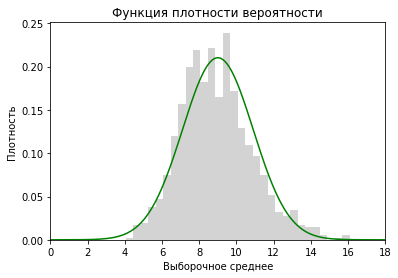

In [24]:
sample_mean(5, 0, 18)

#### При n=10

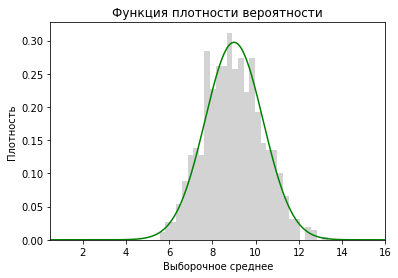

In [27]:
sample_mean(10, 0.5, 16)

#### При n=50

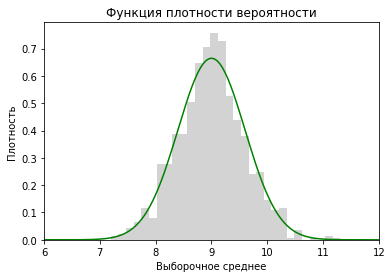

In [29]:
sample_mean(50, 6, 12)

#### При n=500

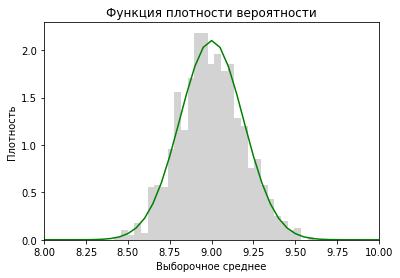

In [31]:
sample_mean(500, 8, 10)

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

По результатам проыеденных экспериментов с различными значениями n(5, 10, 50, 500) можно сделать следующие выводы: 

    1. При увеличении размера выборки распределение средних значений начинает сходиться к мат.ожиданию - следовательно, среднеквадратичное отклонение уменьшается. 
    2. При увеличении размера выборки точность апроксимации увеличивается и гистограмма начинает сводиться к виду нормального распределения.